# Importing Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset  

In [83]:
df = pd.read_csv(r"C:\Users\praka\Downloads\1_india_disability.csv")
df.head()

,State Code,Area Name,Total/ Rural/Urban,Disability,Age-group,Total disabled population - Persons,Total disabled population - Males,Total disabled population - Females,Main worker - Persons,Main worker - Males,Main worker - Females,Non-worker - Persons,Non-worker - Males,Non-worker - Females
0,0,INDIA,Total,Total,Total,26814994,14988593,11826401,6982009,5464857,1517152,17070608,7915768,9154840
1,0,INDIA,Total,Total,0-14,5572336,3073214,2499122,100779,61870,38909,5344297,2942702,2401595
2,0,INDIA,Total,Total,15-59,15728243,9125226,6603017,5808809,4559220,1249589,7785245,3317990,4467255
3,0,INDIA,Total,Total,60+,5376619,2713995,2662624,1036384,816764,219620,3854887,1614909,2239978
4,0,INDIA,Total,Total,Age not stated,137796,76158,61638,36037,27003,9034,86179,40167,46012


# Data Preprocessing

In [84]:
# Data cleaning on Area Name

for i in range(0,len(df)):
    if(df['Area Name'][i] != 'INDIA'):
        df['Area Name'][i] = df['Area Name'][i][8:-5]
df['Area Name'].value_counts()

Area Name
INDIA                        135
JAMMU & KASHMIR              135
JHARKHAND                    135
ODISHA                       135
CHHATTISGARH                 135
MADHYA PRADESH               135
GUJARAT                      135
DAMAN & DIU                  135
DADRA & NAGAR HAVELI         135
MAHARASHTRA                  135
ANDHRA PRADESH               135
KARNATAKA                    135
GOA                          135
LAKSHADWEEP                  135
KERALA                       135
TAMIL NADU                   135
PUDUCHERRY                   135
WEST BENGAL                  135
ASSAM                        135
MEGHALAYA                    135
RAJASTHAN                    135
HIMACHAL PRADESH             135
PUNJAB                       135
CHANDIGARH                   135
UTTARAKHAND                  135
HARYANA                      135
NCT OF DELHI                 135
UTTAR PRADESH                135
TRIPURA                      135
BIHAR                        135


In [85]:
df.rename(columns = {'State Code' : 'Code'}, inplace=True)
df.rename(columns = {'Area Name':'State'}, inplace = True)
df.rename(columns = {'Total/ Rural/Urban':'Area'}, inplace = True)
df.rename(columns = {'Total disabled population - Females':'Total_pop_Female'}, inplace = True)
df.rename(columns = {'Total disabled population - Males':'Total_pop_Male'}, inplace = True)
df.rename(columns = {'Total disabled population - Persons':'Total_pop'}, inplace = True)
df.rename(columns = {'Main worker - Females':'Worker_Female'}, inplace = True)
df.rename(columns = {'Main worker - Males':'Worker_Male'}, inplace = True)
df.rename(columns = {'Main worker - Persons':'Worker_Total'}, inplace = True)
df.rename(columns = {'Non-worker - Males':'Nonworker_Male'}, inplace = True)
df.rename(columns = {'Non-worker - Females':'Nonworker_Female'}, inplace = True)
df.rename(columns = {'Non-worker - Persons':'Nonworker_Total'}, inplace = True)

In [6]:
df['State'] = df['State'].str.title()

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.tail(15)

,Code,State,Area,Disability,Age-group,Total_pop,Total_pop_Male,Total_pop_Female,Worker_Total,Worker_Male,Worker_Female,Nonworker_Total,Nonworker_Male,Nonworker_Female
4845,35,Andaman & Nicobar Islands,Urban,Mental-Illness,Total,100,56,44,6,6,0,93,49,44
4846,35,Andaman & Nicobar Islands,Urban,Mental-Illness,0-14,8,5,3,0,0,0,8,5,3
4847,35,Andaman & Nicobar Islands,Urban,Mental-Illness,15-59,85,47,38,6,6,0,79,41,38
4848,35,Andaman & Nicobar Islands,Urban,Mental-Illness,60+,7,4,3,0,0,0,6,3,3
4849,35,Andaman & Nicobar Islands,Urban,Mental-Illness,Age not stated,0,0,0,0,0,0,0,0,0
4850,35,Andaman & Nicobar Islands,Urban,Any-Other,Total,293,166,127,90,75,15,191,83,108
4851,35,Andaman & Nicobar Islands,Urban,Any-Other,0-14,71,35,36,0,0,0,70,34,36
4852,35,Andaman & Nicobar Islands,Urban,Any-Other,15-59,199,114,85,85,70,15,103,37,66
4853,35,Andaman & Nicobar Islands,Urban,Any-Other,60+,23,17,6,5,5,0,18,12,6
4854,35,Andaman & Nicobar Islands,Urban,Any-Other,Age not stated,0,0,0,0,0,0,0,0,0


In [9]:
disability_count = df['Disability'].value_counts()
disability_count

Disability
Total                  540
In-Seeing              540
In-Hearing             540
In-Speech              540
In-Movement            540
Mental-Retardation     540
Mental-Illness         540
Any-Other              540
Multiple-Disability    540
Name: count, dtype: int64

In [10]:
print(len(df))

4860


In [11]:
df.columns

Index(['Code', 'State', 'Area', 'Disability', 'Age-group', 'Total_pop',
       'Total_pop_Male', 'Total_pop_Female', 'Worker_Total', 'Worker_Male',
       'Worker_Female', 'Nonworker_Total', 'Nonworker_Male',
       'Nonworker_Female'],
      dtype='object')

In [12]:
print(df.describe())

              Code     Total_pop  Total_pop_Male  Total_pop_Female  \
count  4860.000000  4.860000e+03    4.860000e+03      4.860000e+03   
mean     17.500000  8.827982e+04    4.934516e+04      3.893465e+04   
std      10.389364  6.392453e+05    3.599061e+05      2.799268e+05   
min       0.000000  0.000000e+00    0.000000e+00      0.000000e+00   
25%       8.750000  1.847500e+02    1.030000e+02      8.000000e+01   
50%      17.500000  2.619500e+03    1.418000e+03      1.179000e+03   
75%      26.250000  2.801250e+04    1.540275e+04      1.256325e+04   
max      35.000000  2.681499e+07    1.498859e+07      1.182640e+07   

       Worker_Total   Worker_Male  Worker_Female  Nonworker_Total  \
count  4.860000e+03  4.860000e+03   4.860000e+03     4.860000e+03   
mean   2.298604e+04  1.799130e+04   4.994739e+03     5.619953e+04   
std    1.836440e+05  1.434532e+05   4.050627e+04     3.943821e+05   
min    0.000000e+00  0.000000e+00   0.000000e+00     0.000000e+00   
25%    1.500000e+01  1.1

# Geographical Data 

In [13]:
gdf = df[['State','Total_pop']]
gdf.head()

,State,Total_pop
0,India,26814994
1,India,5572336
2,India,15728243
3,India,5376619
4,India,137796


In [14]:
# Assuming your DataFrame is named df
gdf['State'] = gdf['State'].str.title()
gdf['Total_pop'] = gdf['Total_pop'].astype('int')
display(gdf)

C:\Users\praka\AppData\Local\Temp\ipykernel_8440\835372199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['State'] = gdf['State'].str.title()
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\835372199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['Total_pop'] = gdf['Total_pop'].astype('int')


,State,Total_pop
0,India,26814994
1,India,5572336
2,India,15728243
3,India,5376619
4,India,137796
...,...,...
4855,Andaman & Nicobar Islands,165
4856,Andaman & Nicobar Islands,60
4857,Andaman & Nicobar Islands,88
4858,Andaman & Nicobar Islands,17


In [15]:
shape = gpd.read_file(r"C:\Users\praka\BDA Projects\bda\datasets\India-State-and-Country-Shapefile-Updated-Jan-2020-master\India_State_Boundary.shp")
shape['State_Name'][36] = 'Jammu & Kashmir'
shape['State_Name'][0] = 'Andaman & Nicobar Islands'
shape['State_Name'][3] = 'Nct of Delhi'
shape['State_Name'][13] = 'Tamil Nadu'
shape['State_Name'][14] = 'Chhattisgarh'
print(shape['State_Name'])
print(shape.columns)

0                    Andaman & Nicobar Islands
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                 Nct of Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                  Tamil Nadu
14                                Chhattisgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3218416993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape['State_Name'][36] = 'Jammu & Kashmir'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3218416993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape['State_Name'][0] = 'Andaman & Nicobar Islands'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3218416993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape[

In [16]:
total_pop_df = df[(df['State'] != 'India') & (df['Area'] == 'Total') & (df['Disability'] == 'Total') & (df['Age-group'] == 'Total')]
len(total_pop_df)
pop_df = total_pop_df[['State','Total_pop','Total_pop_Male','Total_pop_Female']]
pop_df.reset_index(drop=True, inplace=True)
pop_df

,State,Total_pop,Total_pop_Male,Total_pop_Female
0,Jammu & Kashmir,361153,204834,156319
1,Himachal Pradesh,155316,86321,68995
2,Punjab,654063,379551,274512
3,Chandigarh,14796,8743,6053
4,Uttarakhand,185272,102787,82485
5,Haryana,546374,315533,230841
6,Nct Of Delhi,234882,138379,96503
7,Rajasthan,1563694,848287,715407
8,Uttar Pradesh,4157514,2364171,1793343
9,Bihar,2331009,1343100,987909


In [17]:
total_pop_df.columns

Index(['Code', 'State', 'Area', 'Disability', 'Age-group', 'Total_pop',
       'Total_pop_Male', 'Total_pop_Female', 'Worker_Total', 'Worker_Male',
       'Worker_Female', 'Nonworker_Total', 'Nonworker_Male',
       'Nonworker_Female'],
      dtype='object')

In [18]:
pop_df.describe()

,Total_pop,Total_pop_Male,Total_pop_Female
count,3.500000e+01,3.500000e+01,3.500000e+01
mean,7.661427e+05,4.282455e+05,3.378972e+05
std,9.953315e+05,5.623250e+05,4.335262e+05
min,1.615000e+03,8.380000e+02,7.770000e+02
25%,2.991000e+04,1.626050e+04,1.364950e+04
50%,3.611530e+05,2.048340e+05,1.563190e+05
75%,1.212182e+06,6.660965e+05,5.460860e+05
max,4.157514e+06,2.364171e+06,1.793343e+06


In [19]:
shape=pd.merge(
    left=shape,
    right=pop_df,
    left_on='State_Name',
    right_on='State',
    how='left'
)

print(shape.columns)

Index(['State_Name', 'geometry', 'State', 'Total_pop', 'Total_pop_Male',
       'Total_pop_Female'],
      dtype='object')


In [21]:
shape.info

<bound method DataFrame.info of                                   State_Name  \
0                  Andaman & Nicobar Islands   
1                                 Chandigarh   
2   Daman and Diu and Dadra and Nagar Haveli   
3                               Nct of Delhi   
4                                    Haryana   
5                                  Jharkhand   
6                                  Karnataka   
7                                     Kerala   
8                                Lakshadweep   
9                             Madhya Pradesh   
10                               Maharashtra   
11                                    Odisha   
12                                Puducherry   
13                                Tamil Nadu   
14                              Chhattisgarh   
15                                 Telengana   
16                            Andhra Pradesh   
17                                Puducherry   
18                                       Goa   
19      

In [22]:
shape.columns

Index(['State_Name', 'geometry', 'State', 'Total_pop', 'Total_pop_Male',
       'Total_pop_Female'],
      dtype='object')

In [90]:
shape

,State_Name,geometry,State,Total_pop,Total_pop_Male,Total_pop_Female
0,Andaman & Nicobar Islands,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",Andaman & Nicobar Islands,6660.0,3861.0,2799.0
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",Chandigarh,14796.0,8743.0,6053.0
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",NaN,NaN,NaN,NaN
3,Nct of Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",NaN,NaN,NaN,NaN
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392...",Haryana,546374.0,315533.0,230841.0
5,Jharkhand,"POLYGON ((9762288.285 2772949.712, 9762301.816...",Jharkhand,769980.0,426876.0,343104.0
6,Karnataka,"MULTIPOLYGON (((8608594.474 2090389.205, 86086...",Karnataka,1324205.0,726521.0,597684.0
7,Kerala,"POLYGON ((8347733.191 1436381.747, 8347795.745...",Kerala,761843.0,394706.0,367137.0
8,Lakshadweep,"MULTIPOLYGON (((8135256.290 930182.487, 813526...",Lakshadweep,1615.0,838.0,777.0
9,Madhya Pradesh,"POLYGON ((8724343.278 3106498.184, 8724579.382...",Madhya Pradesh,1551931.0,888751.0,663180.0


# Demographic Profile

# 1. Total Population (Statewise)

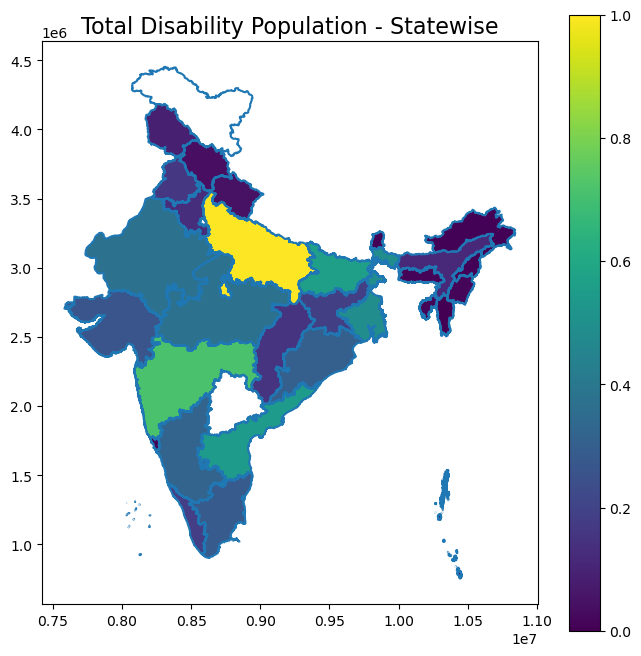

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your GeoDataFrame is named 'shape'
selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi' ,'Haryana',
 'Jharkhand', 'Karnataka', 'Kerala' ,'Lakshadweep', 'Madhya Pradesh',
 'Maharashtra' ,'Odisha' ,'Puducherry' ,'Tamil Nadu' ,'Chhattisgarh',
 'Telengana' ,'Andhra Pradesh' ,'Goa' ,'Himachal Pradesh' ,'Punjab',
 'Rajasthan' ,'Gujarat', 'Uttarakhand' ,'Uttar Pradesh' ,'Sikkim' ,'Assam',
 'Arunachal Pradesh' ,'Nagaland' ,'Manipur' ,'Mizoram' ,'Tripura' ,'Meghalaya',
 'West Bengal' ,'Bihar' ,'Jammu & Kashmir']

# Filter the GeoDataFrame for the selected states
filtered_states = shape[shape['State_Name'].isin(selected_states)]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Plot all states
shape.boundary.plot(ax=ax)

# Scale the population values using MinMaxScaler
scaled_values = scaler.fit_transform(filtered_states[['Total_pop']])
filtered_states['Total_pop'] = scaled_values

# Overlay with data for selected states
filtered_states.plot(ax=ax, column='Total_pop', legend=True, linewidth=0.8)

# Add title
plt.title('Total Disability Population - Statewise', fontsize=16)

plt.show()


# from sklearn.preprocessing import MinMaxScaler

# # Assuming your GeoDataFrame is named 'shape'
# selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
#                    'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
#                    'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
#                    'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
#                    'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
#                    'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
#                    'West Bengal', 'Bihar', 'Jammu & Kashmir']

# # Filter the GeoDataFrame for the selected states
# filtered_states = shape[shape['State_Name'].isin(selected_states)]

# # Plotting
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
# fig.suptitle('Total Population - Statewise', fontsize=16)

# # Define population columns
# pop_columns = ['Total_pop', 'Total_pop_Male', 'Total_pop_Female']

# # Use MinMaxScaler
# scaler = MinMaxScaler()

# for i, ax in enumerate(axes):
#     pop_column = pop_columns[i]
#     ax.set_title(f'Population: {pop_column}')
#     shape.boundary.plot(ax=ax)
    
#     # Scale the population values using MinMaxScaler
#     scaled_values = scaler.fit_transform(filtered_states[[pop_column]])
#     filtered_states[pop_column] = scaled_values
    
#     filtered_states.plot(
#         ax=ax, column=pop_column, legend=True, linewidth=0.8, cmap='viridis', edgecolor='0.8'
#     )
#     ax.set_xticks([])
#     ax.set_yticks([])

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# plt.show()


In [24]:
total_pop_df1 = df[(df['State'] != 'India') & (df['Area'] == 'Total') & (df['Disability'] == 'Total') & (df['Age-group'] != 'Total')]
total_pop_df1.reset_index(drop=True, inplace=True)
total_pop_df1

,Code,State,Area,Disability,Age-group,Total_pop,Total_pop_Male,Total_pop_Female,Worker_Total,Worker_Male,Worker_Female,Nonworker_Total,Nonworker_Male,Nonworker_Female
0,1,Jammu & Kashmir,Total,Total,0-14,73391,40792,32599,679,452,227,70566,39183,31383
1,1,Jammu & Kashmir,Total,Total,15-59,203461,119724,83737,57237,51603,5634,104708,43141,61567
2,1,Jammu & Kashmir,Total,Total,60+,83887,44061,39826,9691,8809,882,64065,28415,35650
3,1,Jammu & Kashmir,Total,Total,Age not stated,414,257,157,91,83,8,282,147,135
4,2,Himachal Pradesh,Total,Total,0-14,21464,12125,9339,277,156,121,19932,11289,8643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,34,Puducherry,Total,Total,Age not stated,31,16,15,3,2,1,27,13,14
136,35,Andaman & Nicobar Islands,Total,Total,0-14,1037,572,465,10,6,4,1011,557,454
137,35,Andaman & Nicobar Islands,Total,Total,15-59,4140,2403,1737,1506,1267,239,2288,903,1385
138,35,Andaman & Nicobar Islands,Total,Total,60+,1480,884,596,163,145,18,1262,698,564


In [25]:
shape1 = gpd.read_file(r"C:\Users\praka\BDA Projects\bda\datasets\India-State-and-Country-Shapefile-Updated-Jan-2020-master\India_State_Boundary.shp")
shape1['State_Name'][36] = 'Jammu & Kashmir'
shape1['State_Name'][0] = 'Andaman & Nicobar Islands'
shape1['State_Name'][3] = 'Nct of Delhi'
shape1['State_Name'][13] = 'Tamil Nadu'
shape1['State_Name'][14] = 'Chhattisgarh'
print(shape1['State_Name'])
print(shape1.columns)

0                    Andaman & Nicobar Islands
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                 Nct of Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                  Tamil Nadu
14                                Chhattisgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

C:\Users\praka\AppData\Local\Temp\ipykernel_8440\1279420867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape1['State_Name'][36] = 'Jammu & Kashmir'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\1279420867.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape1['State_Name'][0] = 'Andaman & Nicobar Islands'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\1279420867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shap

In [26]:
pop_df1 = total_pop_df1[['State','Age-group','Total_pop']]
pop_df1.reset_index(drop=True, inplace=True)
pop_df1

,State,Age-group,Total_pop
0,Jammu & Kashmir,0-14,73391
1,Jammu & Kashmir,15-59,203461
2,Jammu & Kashmir,60+,83887
3,Jammu & Kashmir,Age not stated,414
4,Himachal Pradesh,0-14,21464
...,...,...,...
135,Puducherry,Age not stated,31
136,Andaman & Nicobar Islands,0-14,1037
137,Andaman & Nicobar Islands,15-59,4140
138,Andaman & Nicobar Islands,60+,1480


In [27]:
pop_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      140 non-null    object
 1   Age-group  140 non-null    object
 2   Total_pop  140 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ KB


In [28]:
shape1=pd.merge(
    left=shape1,
    right=pop_df1,
    left_on='State_Name',
    right_on='State',
    how='left'
)

print(shape1.columns)

Index(['State_Name', 'geometry', 'State', 'Age-group', 'Total_pop'], dtype='object')


In [29]:
shape1.info

<bound method DataFrame.info of                     State_Name  \
0    Andaman & Nicobar Islands   
1    Andaman & Nicobar Islands   
2    Andaman & Nicobar Islands   
3    Andaman & Nicobar Islands   
4                   Chandigarh   
..                         ...   
131                     Ladakh   
132            Jammu & Kashmir   
133            Jammu & Kashmir   
134            Jammu & Kashmir   
135            Jammu & Kashmir   

                                              geometry  \
0    MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
1    MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
2    MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
3    MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
4    POLYGON ((8546255.616 3606050.813, 8546315.400...   
..                                                 ...   
131  POLYGON ((8550375.654 3927668.327, 8548619.625...   
132  POLYGON ((8550375.654 3927668.327, 8550332.102...   
133  POLYGON ((8550375.654 3927668.32

# 2. Population by Age (Statewise)

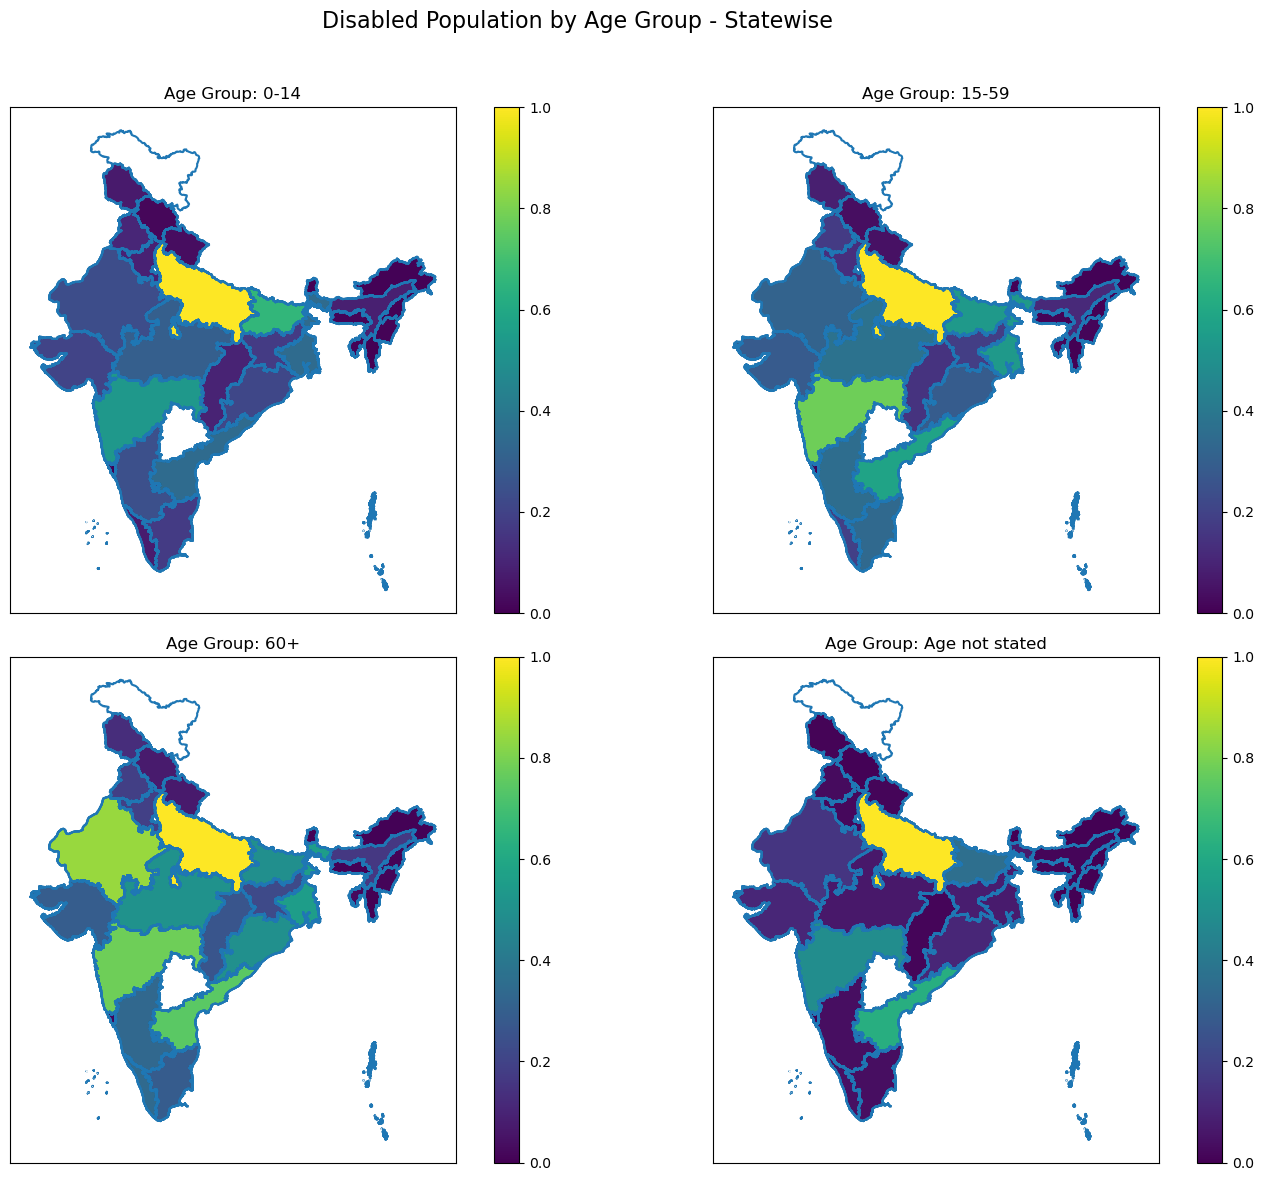

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your GeoDataFrame is named 'shape1'
selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
                   'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
                   'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
                   'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
                   'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
                   'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
                   'West Bengal', 'Bihar', 'Jammu & Kashmir']

# Filter the GeoDataFrame for the selected states
filtered_states = shape1[shape1['State_Name'].isin(selected_states)]

# Define age groups
age_group_columns = ['0-14', '15-59', '60+', 'Age not stated']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Disabled Population by Age Group - Statewise', fontsize=16)

# Normalize data within each age group
scaler = MinMaxScaler()

for i, ax in enumerate(axes.flatten()):
    age_group = age_group_columns[i]
    ax.set_title(f'Age Group: {age_group}')
    
    # Extract data for the specific age group
    age_group_data = filtered_states[filtered_states['Age-group'] == age_group]['Total_pop'].values.reshape(-1, 1)
    
    # Normalize the data within the age group
    normalized_data = scaler.fit_transform(age_group_data)
    
    # Update the GeoDataFrame with the normalized data
    filtered_states.loc[filtered_states['Age-group'] == age_group, 'Total_pop_normalized'] = normalized_data
    
    # Plot the normalized data
    shape1.boundary.plot(ax=ax)
    filtered_states[filtered_states['Age-group'] == age_group].plot(
        ax=ax, column='Total_pop_normalized', legend=True, linewidth=0.8, cmap='viridis'
    )
    
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


In [40]:
total_pop_df2 = df[(df['State'] != 'India') & (df['Area'] != 'Total') & (df['Disability'] == 'Total') & (df['Age-group'] == 'Total')]
total_pop_df2.reset_index(drop=True, inplace=True)
total_pop_df2

,Code,State,Area,Disability,Age-group,Total_pop,Total_pop_Male,Total_pop_Female,Worker_Total,Worker_Male,Worker_Female,Nonworker_Total,Nonworker_Male,Nonworker_Female
0,1,Jammu & Kashmir,Rural,Total,Total,273952,154892,119060,45454,40896,4558,182583,85570,97013
1,1,Jammu & Kashmir,Urban,Total,Total,87201,49942,37259,22244,20051,2193,57038,25316,31722
2,2,Himachal Pradesh,Rural,Total,Total,142665,78963,63702,34735,24978,9757,78159,38766,39393
3,2,Himachal Pradesh,Urban,Total,Total,12651,7358,5293,3784,3096,688,8240,3824,4416
4,3,Punjab,Rural,Total,Total,430313,251289,179024,111861,96863,14998,289921,136521,153400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,33,Tamil Nadu,Urban,Total,Total,558218,310572,247646,168908,129914,38994,360016,162530,197486
66,34,Puducherry,Rural,Total,Total,10581,5880,4701,2792,2210,582,7036,3191,3845
67,34,Puducherry,Urban,Total,Total,19608,10493,9115,5258,4196,1062,13795,5931,7864
68,35,Andaman & Nicobar Islands,Rural,Total,Total,4880,2834,2046,1155,985,170,3369,1609,1760


In [44]:
shape2 = gpd.read_file(r"C:\Users\praka\BDA Projects\bda\datasets\India-State-and-Country-Shapefile-Updated-Jan-2020-master\India_State_Boundary.shp")
shape2['State_Name'][36] = 'Jammu & Kashmir'
shape2['State_Name'][0] = 'Andaman & Nicobar Islands'
shape2['State_Name'][3] = 'Nct of Delhi'
shape2['State_Name'][13] = 'Tamil Nadu'
shape2['State_Name'][14] = 'Chhattisgarh'
print(shape2['State_Name'])
print(shape2.columns)

0                    Andaman & Nicobar Islands
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                 Nct of Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                  Tamil Nadu
14                                Chhattisgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

C:\Users\praka\AppData\Local\Temp\ipykernel_8440\2727991596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape2['State_Name'][36] = 'Jammu & Kashmir'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\2727991596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape2['State_Name'][0] = 'Andaman & Nicobar Islands'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\2727991596.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shap

In [41]:
pop_df2 = total_pop_df2[['State','Area','Total_pop']]
pop_df2.reset_index(drop=True, inplace=True)
pop_df2

,State,Area,Total_pop
0,Jammu & Kashmir,Rural,273952
1,Jammu & Kashmir,Urban,87201
2,Himachal Pradesh,Rural,142665
3,Himachal Pradesh,Urban,12651
4,Punjab,Rural,430313
...,...,...,...
65,Tamil Nadu,Urban,558218
66,Puducherry,Rural,10581
67,Puducherry,Urban,19608
68,Andaman & Nicobar Islands,Rural,4880


In [42]:
pop_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      70 non-null     object
 1   Area       70 non-null     object
 2   Total_pop  70 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


In [45]:
shape2=pd.merge(
    left=shape2,
    right=pop_df2,
    left_on='State_Name',
    right_on='State',
    how='left'
)

print(shape2.columns)

Index(['State_Name', 'geometry', 'State', 'Area', 'Total_pop'], dtype='object')


In [46]:
shape2.info

<bound method DataFrame.info of                                   State_Name  \
0                  Andaman & Nicobar Islands   
1                  Andaman & Nicobar Islands   
2                                 Chandigarh   
3                                 Chandigarh   
4   Daman and Diu and Dadra and Nagar Haveli   
..                                       ...   
65                                     Bihar   
66                                     Bihar   
67                                    Ladakh   
68                           Jammu & Kashmir   
69                           Jammu & Kashmir   

                                             geometry  \
0   MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
1   MULTIPOLYGON (((10341718.474 1449533.161, 1034...   
2   POLYGON ((8546255.616 3606050.813, 8546315.400...   
3   POLYGON ((8546255.616 3606050.813, 8546315.400...   
4   MULTIPOLYGON (((8122247.822 2312434.407, 81223...   
..                                               

# 3. Population - Rural/Urban (Statewise)

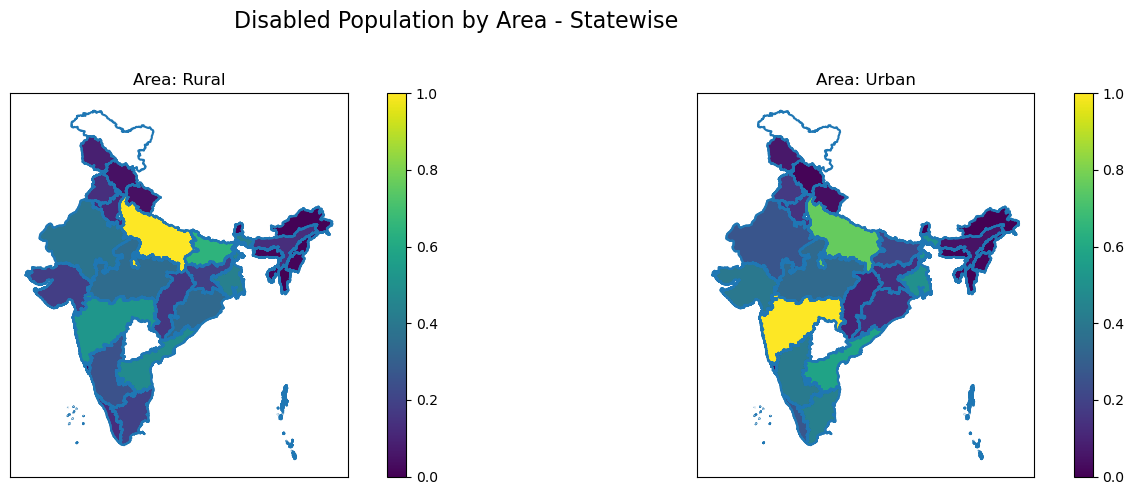

In [99]:
# # Assuming your GeoDataFrame is named 'gdf'
# # Filter the GeoDataFrame for the selected states
# selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
#                    'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
#                    'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
#                    'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
#                    'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
#                    'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
#                    'West Bengal', 'Bihar', 'Jammu & Kashmir']

# # Filter the GeoDataFrame for the selected states
# filtered_states = shape2[shape2['State_Name'].isin(selected_states)]

# # Define area categories
# area_categories = ['Rural', 'Urban']

# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(area_categories), figsize=(15, 5))
# fig.suptitle('Disabled Population by Area - Statewise', fontsize=16)

# for i, ax in enumerate(axes):
#     area_category = area_categories[i]
#     ax.set_title(f'Area: {area_category}')
    
#     # Filter by area category
#     filtered_states_area = filtered_states[filtered_states['Area'] == area_category]
    
#     # Plot boundaries
#     shape2.boundary.plot(ax=ax)
    
#     # Plot disabled population
#     filtered_states_area.plot(ax=ax, column='Total_pop', legend=True, linewidth=0.8)
    
#     ax.set_xticks([])
#     ax.set_yticks([])

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# plt.show()



#Normalization done to the dataset

# Assuming your GeoDataFrame is named 'shape2'
selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
                   'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
                   'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
                   'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
                   'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
                   'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
                   'West Bengal', 'Bihar', 'Jammu & Kashmir']

# Filter the GeoDataFrame for the selected states
filtered_states = shape2[shape2['State_Name'].isin(selected_states)]

# Define area categories
area_categories = ['Rural', 'Urban']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(area_categories), figsize=(15, 5))
fig.suptitle('Disabled Population by Area - Statewise', fontsize=16)

# Define population column
pop_column = 'Total_pop'

# Use MinMaxScaler
scaler = MinMaxScaler()

for i, ax in enumerate(axes):
    area_category = area_categories[i]
    ax.set_title(f'Area: {area_category}')
    
    # Filter by area category
    filtered_states_area = filtered_states[filtered_states['Area'] == area_category]
    
    # Plot boundaries
    shape2.boundary.plot(ax=ax)
    
    # Scale the population values using MinMaxScaler
    scaled_values = scaler.fit_transform(filtered_states_area[[pop_column]])
    filtered_states_area[pop_column] = scaled_values
    
    # Plot disabled population
    filtered_states_area.plot(ax=ax, column=pop_column, legend=True, linewidth=0.8, cmap='viridis', edgecolor='0.8')
    
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()



In [67]:
total_pop_df3 = df[(df['State'] != 'India') & (df['Area'] == 'Total') & (df['Disability'] == 'Total') & (df['Age-group'] == 'Total')]
total_pop_df3.reset_index(drop=True, inplace=True)
total_pop_df3

,Code,State,Area,Disability,Age-group,Total_pop,Total_pop_Male,Total_pop_Female,Worker_Total,Worker_Male,Worker_Female,Nonworker_Total,Nonworker_Male,Nonworker_Female
0,1,Jammu & Kashmir,Total,Total,Total,361153,204834,156319,67698,60947,6751,239621,110886,128735
1,2,Himachal Pradesh,Total,Total,Total,155316,86321,68995,38519,28074,10445,86399,42590,43809
2,3,Punjab,Total,Total,Total,654063,379551,274512,176423,151537,24886,437743,202928,234815
3,4,Chandigarh,Total,Total,Total,14796,8743,6053,4296,3644,652,10155,4858,5297
4,5,Uttarakhand,Total,Total,Total,185272,102787,82485,44439,33341,11098,120384,57919,62465
5,6,Haryana,Total,Total,Total,546374,315533,230841,129013,110292,18721,375774,179708,196066
6,7,Nct Of Delhi,Total,Total,Total,234882,138379,96503,60151,52895,7256,169309,81361,87948
7,8,Rajasthan,Total,Total,Total,1563694,848287,715407,359658,280548,79110,1021852,477864,543988
8,9,Uttar Pradesh,Total,Total,Total,4157514,2364171,1793343,935988,779304,156684,2711121,1259802,1451319
9,10,Bihar,Total,Total,Total,2331009,1343100,987909,517558,425693,91865,1465662,689062,776600


In [68]:
shape3 = gpd.read_file(r"C:\Users\praka\BDA Projects\bda\datasets\India-State-and-Country-Shapefile-Updated-Jan-2020-master\India_State_Boundary.shp")
shape3['State_Name'][36] = 'Jammu & Kashmir'
shape3['State_Name'][0] = 'Andaman & Nicobar Islands'
shape3['State_Name'][3] = 'Nct of Delhi'
shape3['State_Name'][13] = 'Tamil Nadu'
shape3['State_Name'][14] = 'Chhattisgarh'
print(shape3['State_Name'])
print(shape3.columns)

0                    Andaman & Nicobar Islands
1                                   Chandigarh
2     Daman and Diu and Dadra and Nagar Haveli
3                                 Nct of Delhi
4                                      Haryana
5                                    Jharkhand
6                                    Karnataka
7                                       Kerala
8                                  Lakshadweep
9                               Madhya Pradesh
10                                 Maharashtra
11                                      Odisha
12                                  Puducherry
13                                  Tamil Nadu
14                                Chhattisgarh
15                                   Telengana
16                              Andhra Pradesh
17                                  Puducherry
18                                         Goa
19                            Himachal Pradesh
20                                      Punjab
21           

C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3174327286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape3['State_Name'][36] = 'Jammu & Kashmir'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3174327286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shape3['State_Name'][0] = 'Andaman & Nicobar Islands'
C:\Users\praka\AppData\Local\Temp\ipykernel_8440\3174327286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shap

In [63]:
pop_df3 = total_pop_df3[['State','Worker_Total','Nonworker_Total']]
pop_df3.reset_index(drop=True, inplace=True)
pop_df3

,State,Worker_Total,Nonworker_Total
0,Jammu & Kashmir,67698,239621
1,Himachal Pradesh,38519,86399
2,Punjab,176423,437743
3,Chandigarh,4296,10155
4,Uttarakhand,44439,120384
5,Haryana,129013,375774
6,Nct Of Delhi,60151,169309
7,Rajasthan,359658,1021852
8,Uttar Pradesh,935988,2711121
9,Bihar,517558,1465662


In [69]:
pop_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            35 non-null     object
 1   Worker_Total     35 non-null     int64 
 2   Nonworker_Total  35 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 972.0+ bytes


In [70]:
shape3=pd.merge(
    left=shape3,
    right=pop_df3,
    left_on='State_Name',
    right_on='State',
    how='left'
)

print(shape3.columns)

Index(['State_Name', 'geometry', 'State', 'Worker_Total', 'Nonworker_Total'], dtype='object')


In [71]:
shape3.info

<bound method DataFrame.info of                                   State_Name  \
0                  Andaman & Nicobar Islands   
1                                 Chandigarh   
2   Daman and Diu and Dadra and Nagar Haveli   
3                               Nct of Delhi   
4                                    Haryana   
5                                  Jharkhand   
6                                  Karnataka   
7                                     Kerala   
8                                Lakshadweep   
9                             Madhya Pradesh   
10                               Maharashtra   
11                                    Odisha   
12                                Puducherry   
13                                Tamil Nadu   
14                              Chhattisgarh   
15                                 Telengana   
16                            Andhra Pradesh   
17                                Puducherry   
18                                       Goa   
19      

# 4. Population - Worker/Non-Worker (Statewise)

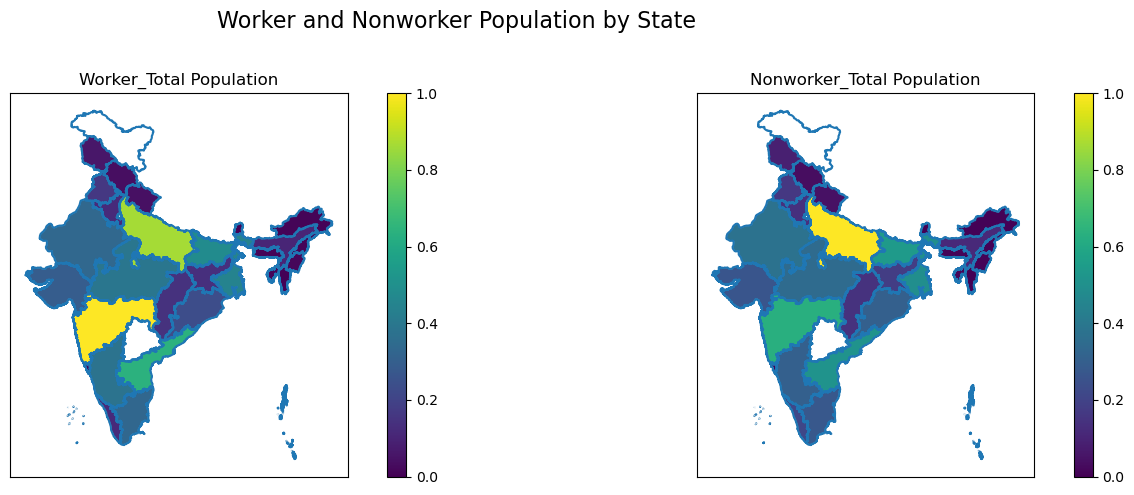

In [100]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# # Assuming your GeoDataFrame is named 'shape3'
# selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
#                    'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
#                    'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
#                    'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
#                    'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
#                    'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
#                    'West Bengal', 'Bihar', 'Jammu & Kashmir']

# # Filter the GeoDataFrame for the selected states
# filtered_states = shape3[shape3['State_Name'].isin(selected_states)]

# # Define columns
# columns_to_plot = ['Worker_Total', 'Nonworker_Total']

# # Create subplots
# fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))
# fig.suptitle('Worker and Nonworker Population by State', fontsize=16)

# for i, ax in enumerate(axes):
#     column_name = columns_to_plot[i]
#     ax.set_title(f'{column_name} Population')
    
#     # Plot boundaries
#     shape3.boundary.plot(ax=ax)
    
#     # Plot population
#     filtered_states.plot(ax=ax, column=column_name, legend=True, linewidth=0.8)
    
#     ax.set_xticks([])
#     ax.set_yticks([])

# # Adjust layout
# plt.tight_layout(rect=[0, 0, 1, 0.96])

# plt.show()


#Using Normalised datasets

# Assuming your GeoDataFrame is named 'shape3'
selected_states = ['Andaman & Nicobar Islands', 'Chandigarh', 'Nct of Delhi', 'Haryana',
                   'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
                   'Maharashtra', 'Odisha', 'Puducherry', 'Tamil Nadu', 'Chhattisgarh',
                   'Telengana', 'Andhra Pradesh', 'Goa', 'Himachal Pradesh', 'Punjab',
                   'Rajasthan', 'Gujarat', 'Uttarakhand', 'Uttar Pradesh', 'Sikkim', 'Assam',
                   'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya',
                   'West Bengal', 'Bihar', 'Jammu & Kashmir']

# Filter the GeoDataFrame for the selected states
filtered_states = shape3[shape3['State_Name'].isin(selected_states)]

# Define columns
columns_to_plot = ['Worker_Total', 'Nonworker_Total']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))
fig.suptitle('Worker and Nonworker Population by State', fontsize=16)

# Use MinMaxScaler
scaler = MinMaxScaler()

for i, ax in enumerate(axes):
    column_name = columns_to_plot[i]
    ax.set_title(f'{column_name} Population')
    
    # Plot boundaries
    shape3.boundary.plot(ax=ax)
    
    # Scale the population values using MinMaxScaler
    scaled_values = scaler.fit_transform(filtered_states[[column_name]])
    filtered_states[column_name] = scaled_values
    
    # Plot population
    filtered_states.plot(ax=ax, column=column_name, legend=True, linewidth=0.8, cmap='viridis', edgecolor='0.8')
    
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

